In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from numpy import linalg as LA          #linalg --> Linear Algegra
from sklearn.cluster import KMeans      # Library support for ML algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.datasets, sklearn.decomposition
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
from sklearn.cluster import KMeans
#import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

In [5]:

Start=1
End=50

ProjectPath = os.getcwd()
DataFile = ProjectPath + "\\credit_card_balance.csv"


In [6]:
df = pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/credit_card_balance.csv")

df = df[Start:End]

df['NAME_CONTRACT_STATUS'].replace(['Completed', 'Active'],[0,1], inplace=True)


In [7]:
df = pd.read_csv("C:/Users/safiyaa/Downloads/home-credit-default-risk/credit_card_balance.csv")

df = df[Start:End]

In [8]:
features = df.columns
df=df.drop([features[0],features[1],features[20]], axis = 1)

In [9]:
df = df.fillna(0)

In [10]:
features = df.columns
print(features)

Index(['MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT',
       'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT',
       'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL',
       'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


In [11]:
# Separating out the features
x = df.drop([features[1]],axis=1)

In [12]:
# Separating out the target
y = df.loc[:,[features[1]]].values

In [13]:
pca_comps=10
pca = PCA(n_components=pca_comps)
cols=[]
principalComponents = pca.fit_transform(x)

In [14]:
for r in range(0,pca_comps):
    s="PCA-"+str(r+1)
    cols.append(s)


In [19]:
principalDf = pd.DataFrame(data = principalComponents,columns = cols)

print("\n",principalDf)


             PCA-1          PCA-2          PCA-3          PCA-4         PCA-5  \
0  -181081.516977 -123433.455088  -28306.031498    1627.925336 -11344.715779   
1   -56705.261352  266049.067433  -15637.172984    7044.942476 -10740.988590   
2   156690.953517  -86271.099332  -53883.148053    3303.490398   4873.322961   
3   597012.418003  -48969.121140  -76956.839287   15268.987164  29090.155888   
4   -54289.757166   65214.260486  -29207.977584    5175.344017  -8094.825883   
5   506047.270873  143555.325067   13461.024398  -21728.383287   2808.354421   
6  -201811.648644 -114404.520348   27378.045291  -17588.749685 -20975.022897   
7   300841.158303  -90721.862283  270735.064579  131771.452774 -24990.399377   
8   114890.130576  -69467.756558   90968.616023  -12373.579161  34370.095553   
9   -65265.360318  -31415.353525   81161.429830  -38253.702165 -21435.362156   
10   -4775.641999   -8774.176695  -24630.759774    -452.457880  -5747.423252   
11 -229794.274355   -4715.371371  1157

In [21]:
X = df.to_numpy()#np.array(df[)

In [22]:
linked = linkage(X, 'single')
labelList = range(1, len(X)+1)


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0],
  [35.625, 35.625, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [107.5, 107.5, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [140.0, 140.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [170.0, 170.0, 185.0, 185.0],
  [177.5, 177.5, 195.0, 195.0],
  [186.25, 186.25, 205.0, 205.0],
  [195.625, 195.625, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [205.3125, 205.3125, 230.0, 230.0],
  [147.5, 147.5, 217.65625, 217.65625],
  [116.25, 116.25, 182.578125, 182.578125],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [260.0, 260.0, 285.0, 285.0],
  [272.5, 272.5, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [310.0, 310.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [317.5, 317.5, 340.0, 340.0],
  [283.75, 283.75, 328.7

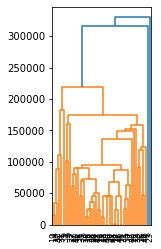

In [22]:
plt.subplot(1,3,1)
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)


In [24]:
features = df


In [25]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(features)


In [20]:
inertia = []
K = range(1,10)
for k in K:
    print("k = ",k) 
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)

k =  1


C:\Users\safiyaa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\safiyaa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


Text(0, 0.5, 'Inertia')

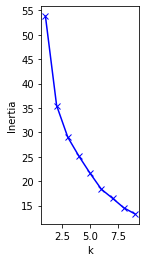

In [26]:
# Plot the elbow
plt.subplot(1,3,2)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')

In [27]:
kmeans = KMeans(n_clusters=4).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_)

In [28]:
labeledColleges = pd.concat((features,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
labeledColleges.head()

,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,labels
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,-1.0,63975.555,45000.0,2250.0,2250.0,0.0,0.0,2250.00,2250.0,2250.0,...,64875.555,64875.555,1.0,1.0,0.0,0.0,69.0,0.0,0.0,1.0
2,-7.0,31815.225,450000.0,0.0,0.0,0.0,0.0,2250.00,2250.0,2250.0,...,31460.085,31460.085,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0
3,-4.0,236572.110,225000.0,2250.0,2250.0,0.0,0.0,11795.76,11925.0,11925.0,...,233048.970,233048.970,1.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0
4,-1.0,453919.455,450000.0,0.0,11547.0,0.0,11547.0,22924.89,27000.0,27000.0,...,453919.455,453919.455,0.0,1.0,0.0,1.0,101.0,0.0,0.0,1.0


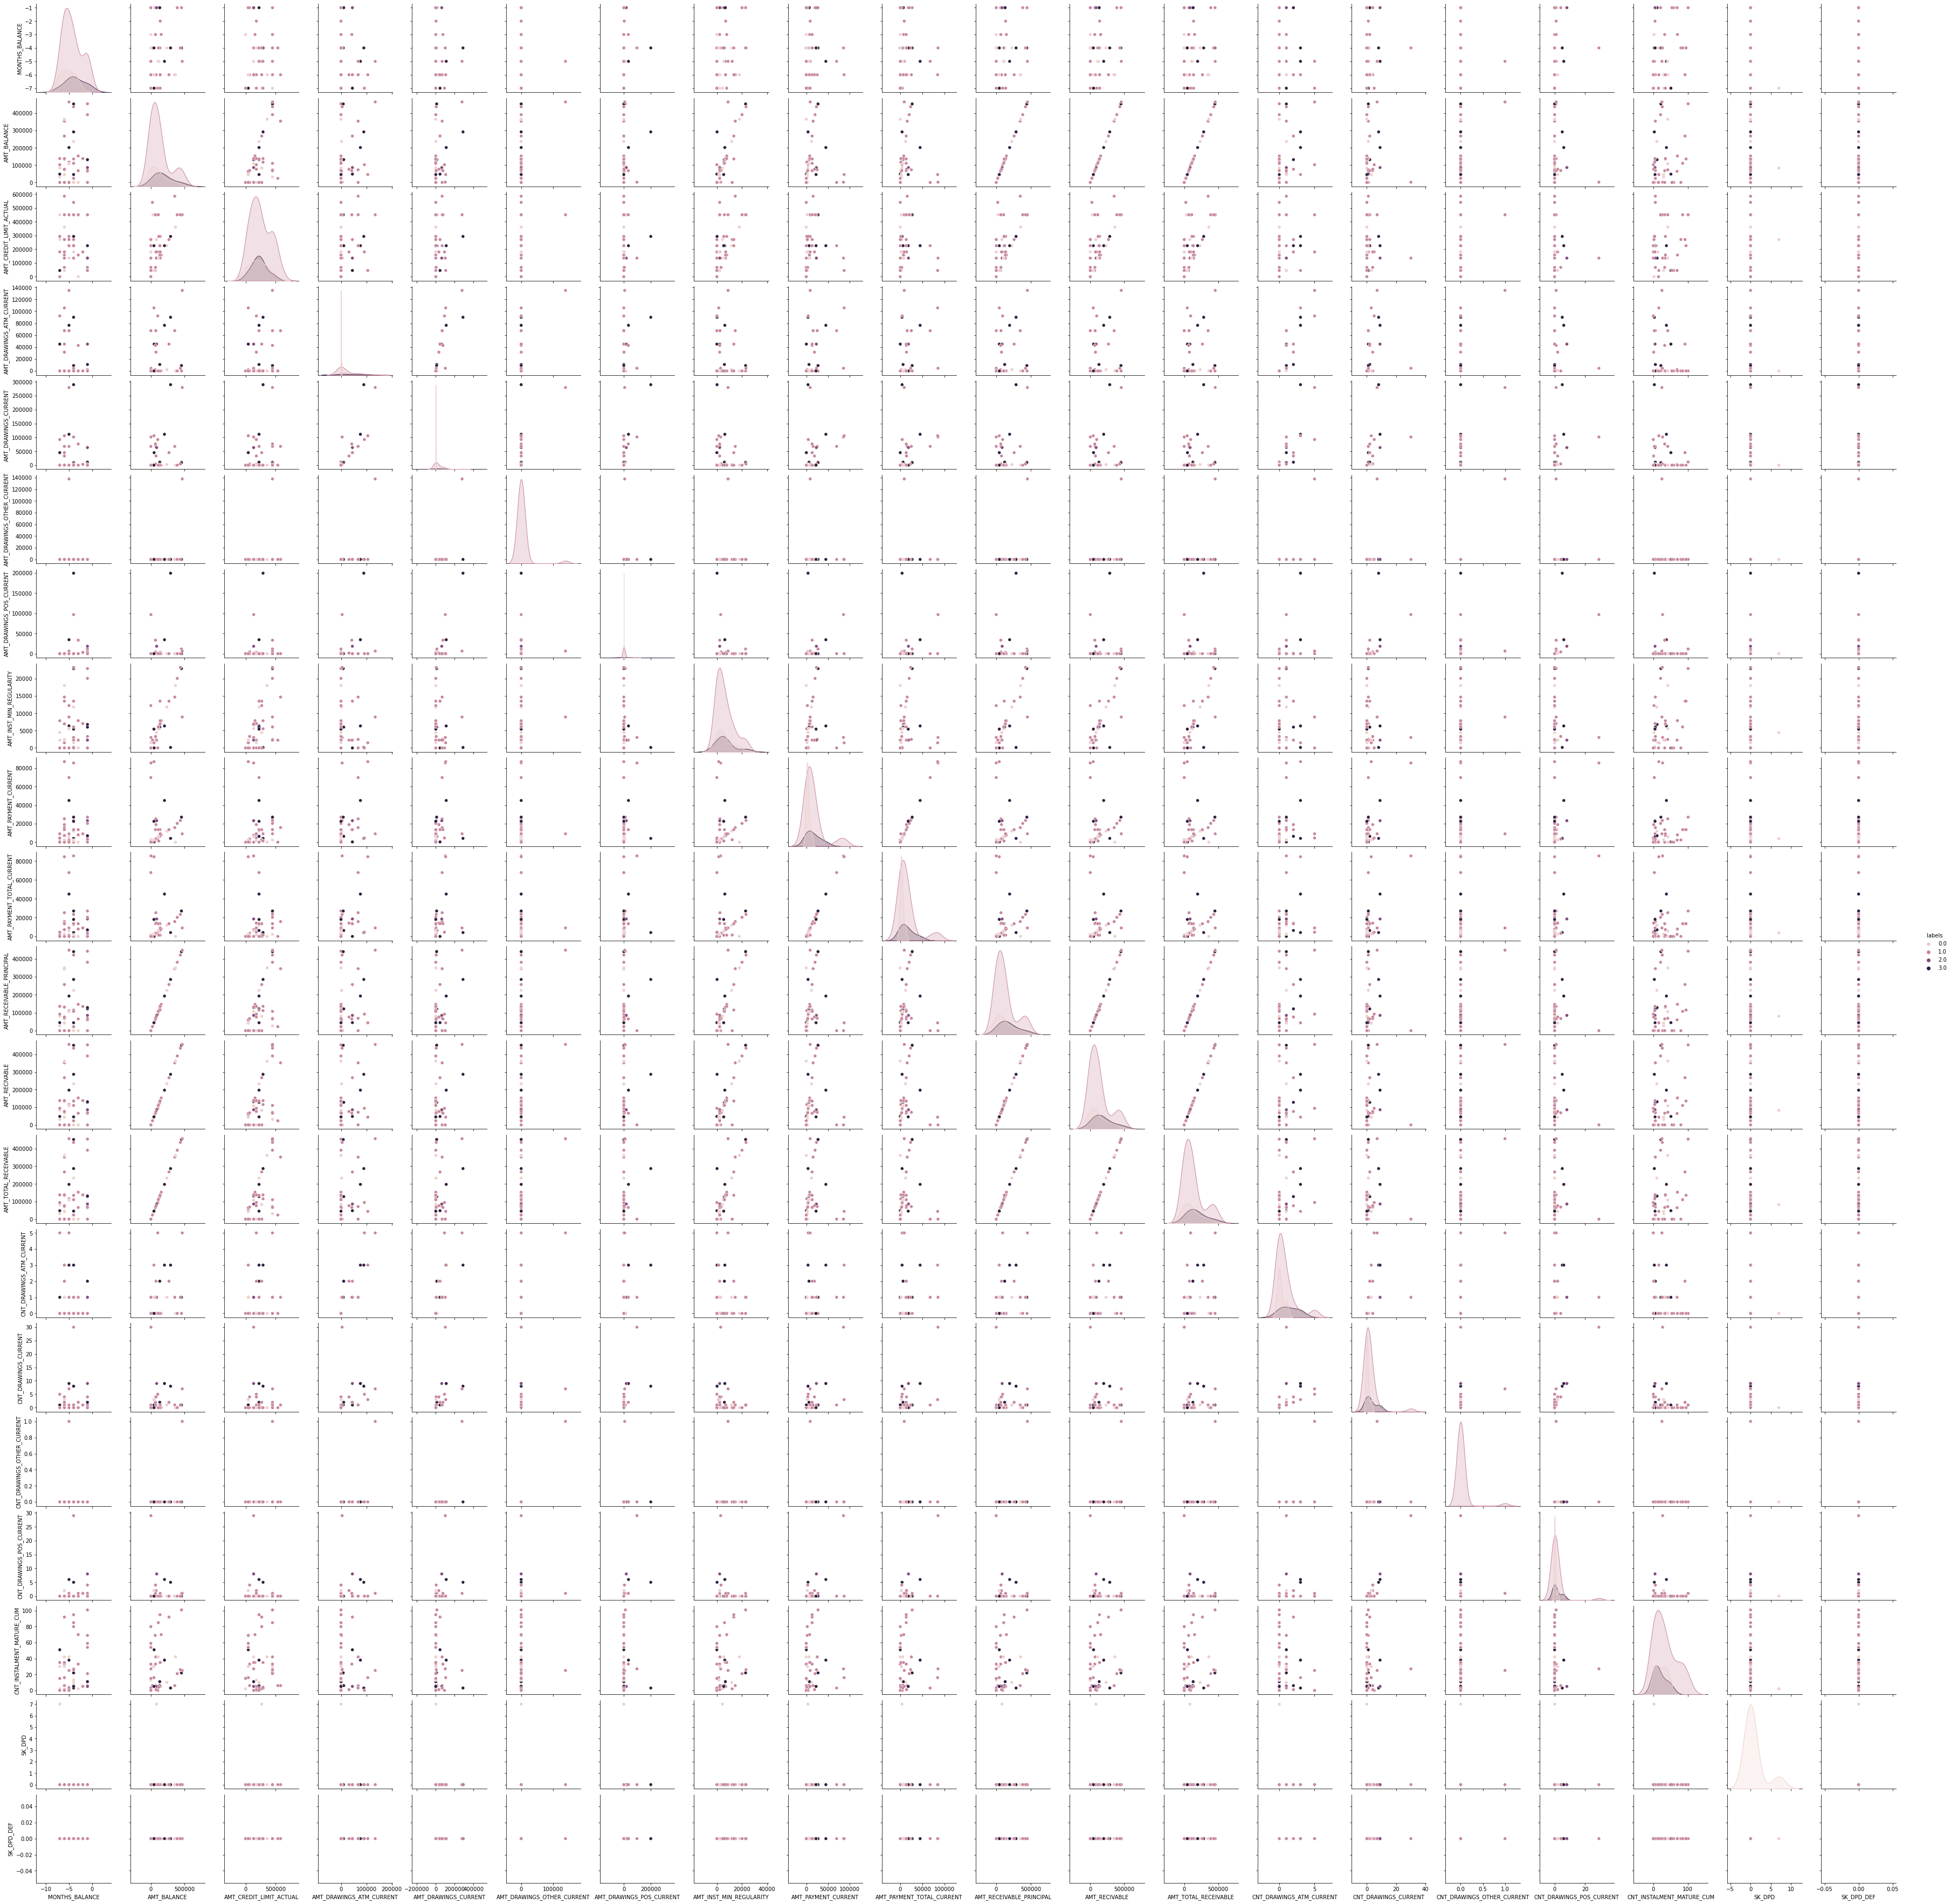

In [29]:
sns.pairplot(labeledColleges,hue='labels')
plt.show()
